In [3]:
# assignment on Binary Classification_ 7/23/2020
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# splitting the DATA sets into TRAIN and TEST data sets
# Perofrm Logisitc REgression on age v. death
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.metrics import accuracy_score

# importing the roc curve, make_scorer
from sklearn.metrics import roc_curve, make_scorer, accuracy_score


df_cvd=pd.read_csv("COVID19_line_list_data.csv")

# extract two columns

In [4]:
df_cvd.dropna(subset=["age"], inplace=True)

df_cvd.dtypes


# cleaning the death column, if the data is 0 return 0 or else 1
#df_cvd["death"]= df_cvd["death"].apply(lambda x: 0 if x=='0' else '1')

# if 0 means, patient survived and recovered

# if '1 or a date' patient DIED
# make a list
print("********")

#converting the val to 0 or 1
def conv(x):
    if x=='0':
        return 0
    else:
        return 1


xval= np.array(df_cvd["age"])
yval= np.array(df_cvd["death"])

yval= np.array([conv(x) for x in yval])
    
#df_cvd["death"]= df_cvd["death"].apply(lambda x: 0 if x =="0" else 1)
#Eyval=np.array(df_cvd["death"])


********


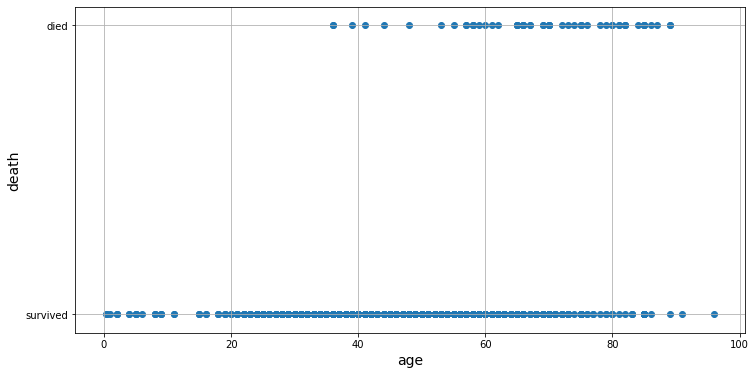

In [5]:
plt.scatter(xval, yval)
plt.grid()

plt.xlabel("age", fontsize="14")
plt.ylabel("death", fontsize="14")

# patients that survived and died
plt.yticks([0,1], ["survived", "died"])

plt.gcf().set_size_inches(12,6)

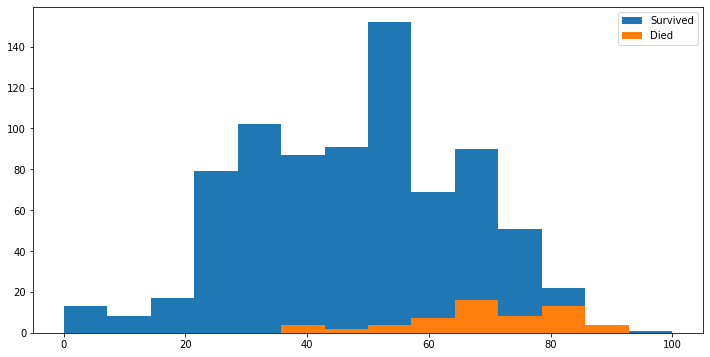

In [6]:
# Creating bins using the linspace
BINS= np.linspace(0,100,15) #from age 0 to 100,with difference of 5

# use log scale to see the death

# based on the patients who survived or died
surv= plt.hist(xval[ yval == 0], bins= BINS, label="Survived")
died= plt.hist(xval[ yval == 1], bins= BINS, label="Died")
plt.gcf().set_size_inches(12,6)
plt.legend()

(-0.2, 1.2)

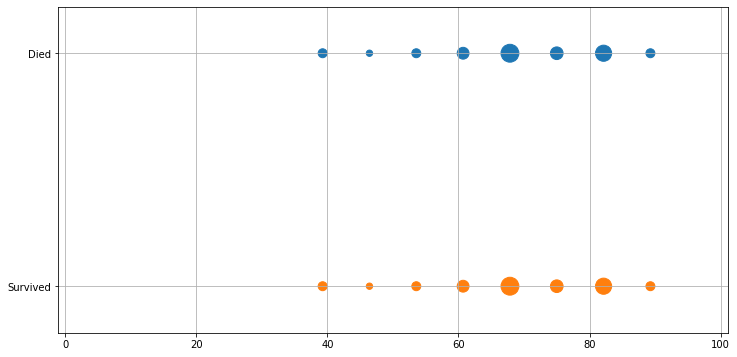

In [7]:
# using bins to display the data on the scatter plot
BINSCENTERS= 0.5 *(BINS[:-1] + BINS[1:])


# here using the patients who died, 'died' i.e. 1
plt.scatter(BINSCENTERS, len(BINSCENTERS)*[1], s=20*died[0])
plt.scatter(BINSCENTERS, len(BINSCENTERS)*[0], s=20*died[0])
plt.gcf().set_size_inches(12,6)
plt.grid()
plt.yticks([0,1], ["Survived", "Died"])
plt.ylim([-.2, 1.2])


In [8]:
# Reshaping the xval

xval=xval.reshape(-1,1)
# Getting the model FIT from logistic regression with the TRAIN DATA set
xtrain, xtest, ytrain, ytest= train_test_split(xval, yval)

len(xtrain), len(xtest), len(ytrain), len(ytest)

model= LogR()
model.fit(xtrain, ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# ypredicted value from the LOGISTIC regression fit MODEL
# USING THE xtest data set
ypredict= model.predict(xtest)

# finding the accuracy using the ytest and the y-predict value
accuracy_score(ytest, ypredict)

0.9289099526066351

In [22]:
# 4. REpeat the Train/TEst split at least 10 times to observe the variation in accuracy
T_acc=[]

# How improtant is the randomization? 
# here, we will repeat and observe the VARIATION

for a in range(1000):
    # spliting the data sets, TRAIN and TEST
    xtrain, xtest, ytrain, ytest= train_test_split(xval, yval)
    # using Logistic Regression to get the model fit
    model.fit(xtrain, ytrain)
    ypredict= model.predict(xtest)
    # inserting the accuracy scores in the LIST
    T_acc.append(accuracy_score(ytest, ypredict))
    

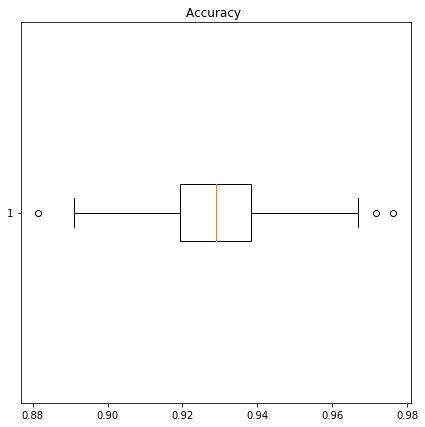

In [11]:
#using BOX plt to view the Randomization

plt.boxplot(T_acc, vert=False)
plt.title('Accuracy ')
plt.gcf().set_size_inches(7,7)

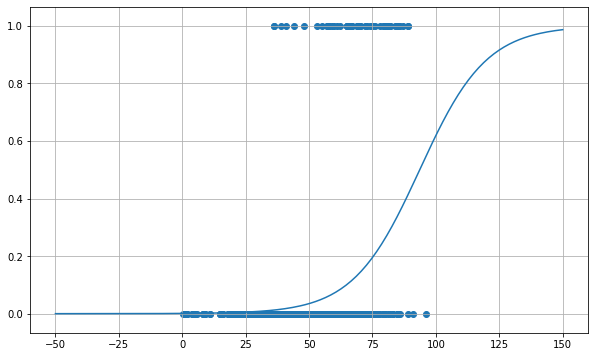

In [12]:
# finding the intercepts

# LOGISTIC function
def logistic_function(x, a, b):
    return (1/(1 + np.exp(- (a+b * x))))

# finding the a and b parameters

a= model.intercept_[0]
b= model.coef_[0,0]



# get the curve values
x_curve=np.linspace(-50, 150, 200)
y_curve= logistic_function(x_curve, a, b)

#ploting the CURVE
plt.plot( x_curve, y_curve)

#ploting the ORIGINAL DATA in SCATTER
plt.scatter(xval, yval)
plt.grid()
plt.gcf().set_size_inches(10,6)

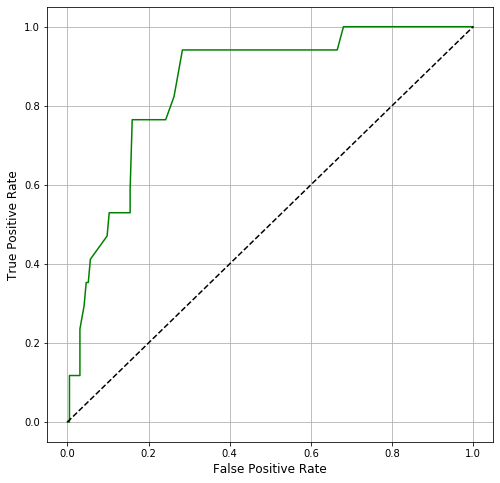

In [13]:
# predict the label of the testing set x_test

# getting the probabilities form a model
# model is the LR from xtrain and ytrain DATA SET
prob= model.predict_proba(xtest)[:, 1]

#getting the parameters from the PROBABILITY
#reshpae the ytest

#ytest=ytest.reshape(-1,1)

FPR, TPR, thresholds= roc_curve(ytest, prob)

plt.plot(FPR, TPR, c='green', label="logistic Regression")

# label
plt.xlabel("False Positive Rate", fontsize="12")
plt.ylabel("True Positive Rate", fontsize="12")
# plot 45 degree line
plt.plot([0,1],[0,1], c='k', ls='--', label="45 Degree Line")
plt.gcf().set_size_inches(8,8)
plt.grid()

In [14]:
# REpeat the train TEST at least 10 times
# use different colors to show the ROC CURVES

# first train the data sets into TRAIN and TEST data sets
# return the Accuracy 
# plot different colors for each ROC curve

colors=['r', 'g', 'b', 'tab:blue', 'm', 'c', 'palegreen', 'peru', 'salmon', 'pink', 'magneta', 'tab:gray']

def log_reg(x, y, i):
    model=LogR()
    
    # split the data sets
    xtrain, xtest, ytrain, ytest= train_test_split(x, y)
    # use Logistic REgression to get the predict value
    model.fit(xtrain, ytrain) # to get the MODEL fit from the TRAIN data sets
    
    # Get the y-predict from FIT model using xtest data set
    ypredict= model.predict(xtest)
    
    # accuracry of the model, measurement
    accuracy= accuracy_score( ytest, ypredict)
    
    # finding the probabilities from logistic REGRESSION model using xtest
    prob= model.predict_proba(xtest)[:,1]
    
    # Extracting the PARAMETERS from the Probability 
    FPR, TPR, THRESHOLDS= roc_curve(ytest, prob)
    
    # plot the extracted PARAMETERS FROM ROC curve
    # using LISTS of colors to show the curves
    plt.plot(FPR, TPR, c=colors[i])
    
    return accuracy
    

Text(0.5, 1.0, 'COVID-19 First 1000 Cases: Age V. Death')

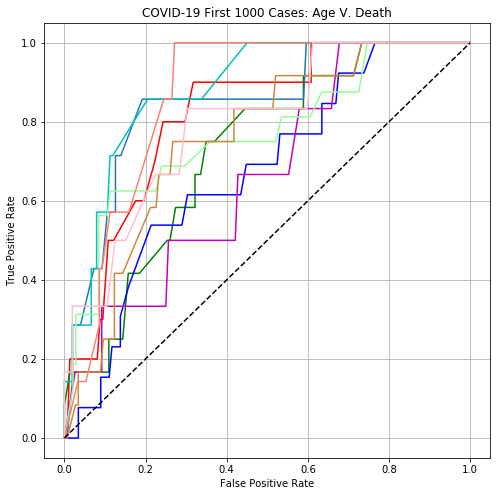

In [15]:
# Collect the accuracy of 10 TRAIN DATA SETS
accuracies=[]

for i in range(10):
    # append the accuracy of each TRAINED data set
    accuracies.append(log_reg(xtrain, ytrain, i))

# Transform the collected ACCURACIES into NUMPY ARRAY
np_accuracies= np.array(accuracies)

# now plot the data sets
plt.plot([0,1], [0,1], c='k', ls='--')
plt.grid()
plt.gcf().set_size_inches(8,8)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("COVID-19 First 1000 Cases: Age V. Death")


In [16]:
# LEAVE out 1 cross VALIDATION and use 10 more splits

accuracy_scorer= make_scorer(accuracy_score)

cross_val_accuracies= cross_val_score(LogR(), xval, yval, scoring= accuracy_scorer, cv=10)

cross_val_accuracies.mean()

0.9276330532212885

In [17]:
# USING KFold splits to evalutae Logistic Rregression model

